# Importar as libs e os dados

In [150]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [151]:
cancer_data = pd.read_csv('data.csv')
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Limpar e normalizar os dados

In [152]:
cancer_data = cancer_data.drop('Unnamed: 32', axis=1)

ValueError: labels ['Unnamed: 32'] not contained in axis

In [153]:
cancer_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [154]:
def M_B_0_1(label):
    if label == 'M':
        return 1
    else:
        return 0

In [155]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].apply(M_B_0_1)

In [156]:
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [157]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [158]:
cols_normalizar = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [159]:
cancer_data[cols_normalizar] = cancer_data[cols_normalizar].apply(lambda x: (x - np.mean(x)) / (np.std(x)  ) )

In [160]:
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,843786,1,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,844359,1,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,84458202,1,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,844981,1,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,84501001,1,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


# Inserir dados no tensorflow

In [161]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [162]:
radius_mean =tf.feature_column.numeric_column('radius_mean')
texture_mean =tf.feature_column.numeric_column('texture_mean')
perimeter_mean =tf.feature_column.numeric_column('perimeter_mean')
area_mean =tf.feature_column.numeric_column('area_mean')
smoothness_mean =tf.feature_column.numeric_column('smoothness_mean')
compactness_mean =tf.feature_column.numeric_column('compactness_mean')
concavity_mean =tf.feature_column.numeric_column('concavity_mean')
concave_points_mean =tf.feature_column.numeric_column('concave_points_mean')
symmetry_mean =tf.feature_column.numeric_column('symmetry_mean')
fractal_dimension_mean =tf.feature_column.numeric_column('fractal_dimension_mean')
radius_se =tf.feature_column.numeric_column('radius_se')
texture_se =tf.feature_column.numeric_column('texture_se')
perimeter_se =tf.feature_column.numeric_column('perimeter_se')
area_se =tf.feature_column.numeric_column('area_se')
smoothness_se =tf.feature_column.numeric_column('smoothness_se')
compactness_se =tf.feature_column.numeric_column('compactness_se')
concavity_se =tf.feature_column.numeric_column('concavity_se')
concave_points_se =tf.feature_column.numeric_column('concave_points_se')
symmetry_se =tf.feature_column.numeric_column('symmetry_se')
fractal_dimension_se =tf.feature_column.numeric_column('fractal_dimension_se')
radius_worst =tf.feature_column.numeric_column('radius_worst')
texture_worst =tf.feature_column.numeric_column('texture_worst')
perimeter_worst =tf.feature_column.numeric_column('perimeter_worst')
area_worst =tf.feature_column.numeric_column('area_worst')
smoothness_worst =tf.feature_column.numeric_column('smoothness_worst')
compactness_worst =tf.feature_column.numeric_column('compactness_worst')
concavity_worst =tf.feature_column.numeric_column('concavity_worst')
concave_points_worst =tf.feature_column.numeric_column('concave_points_worst')
symmetry_worst =tf.feature_column.numeric_column('symmetry_worst')
fractal_dimension_worst =tf.feature_column.numeric_column('fractal_dimension_worst')

In [163]:
feat_cols = [radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,
            concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,
            smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,
            radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,
            concave_points_worst,symmetry_worst,fractal_dimension_worst]

Retirar a coluna ID e separar o input do output ( coluna diagnosis)

In [164]:
labels_to_drop = ['id','diagnosis']
x_data = cancer_data.drop(labels=labels_to_drop,axis=1)
y_data = cancer_data['diagnosis']

In [165]:
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [166]:
y_data

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Separando os datasets de treino e testes.

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=101)

# Treinando com o tensorflow

In [169]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [170]:
model = tf.estimator.DNNClassifier(hidden_units=[40,40],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_session_config': None, '_tf_random_seed': 1, '_model_dir': '/tmp/tmp0ha7g65w', '_log_step_count_steps': 100}


In [171]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp0ha7g65w/model.ckpt.
INFO:tensorflow:step = 1, loss = 7.84357
INFO:tensorflow:global_step/sec: 146.82
INFO:tensorflow:step = 101, loss = 0.00734231 (0.697 sec)
INFO:tensorflow:global_step/sec: 148.961
INFO:tensorflow:step = 201, loss = 0.205645 (0.665 sec)
INFO:tensorflow:global_step/sec: 145.147
INFO:tensorflow:step = 301, loss = 0.00465628 (0.700 sec)
INFO:tensorflow:global_step/sec: 146.647
INFO:tensorflow:step = 401, loss = 0.0249016 (0.673 sec)
INFO:tensorflow:global_step/sec: 149.369
INFO:tensorflow:step = 501, loss = 0.174092 (0.671 sec)
INFO:tensorflow:global_step/sec: 153.499
INFO:tensorflow:step = 601, loss = 0.00556896 (0.649 sec)
INFO:tensorflow:global_step/sec: 155.045
INFO:tensorflow:step = 701, loss = 0.000206889 (0.647 sec)
INFO:tensorflow:global_step/sec: 145.129
INFO:tensorflow:step = 801, loss = 0.023127 (0.691 sec)
INFO:tensorflow:global_step/sec: 147.451
INFO:tensorflo

In [172]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [173]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-10-24-17:41:14
INFO:tensorflow:Restoring parameters from /tmp/tmp0ha7g65w/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-10-24-17:41:16
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.976608, accuracy_baseline = 0.614035, auc = 0.982973, auc_precision_recall = 0.988012, average_loss = 0.260967, global_step = 1000, label/mean = 0.385965, loss = 2.47919, prediction/mean = 0.384739


In [174]:
results

{'accuracy': 0.97660822,
 'accuracy_baseline': 0.61403513,
 'auc': 0.98297256,
 'auc_precision_recall': 0.98801154,
 'average_loss': 0.26096696,
 'global_step': 1000,
 'label/mean': 0.3859649,
 'loss': 2.4791861,
 'prediction/mean': 0.38473925}

# Fazendo predições

In [175]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                     shuffle=False)

In [176]:
predictions = model.predict(pred_input_func)

In [177]:
my_predictions = list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmp0ha7g65w/model.ckpt-1000


In [178]:
valores_finais_predicao = [pred['class_ids'][0] for pred in my_predictions]

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.00049833], dtype=float32),
  'logits': array([-7.60375595], dtype=float32),
  'probabilities': array([  9.99501705e-01,   4.98326845e-04], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.00042418], dtype=float32),
  'logits': array([-7.76493692], dtype=float32),
  'probabilities': array([  9.99575794e-01,   4.24176367e-04], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([  4.01153047e-05], dtype=float32),
  'logits': array([-10.12371254], dtype=float32),
  'probabilities': array([  9.99959826e-01,   4.01153011e-05], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.99960822], dtype=float32),
  'logits': array([ 7.84439659], dtype=float32),
  'probabilities': array([  3.91788490e-04,   9.99608219e-01], dtype=float32)}

In [180]:
from sklearn.metrics import classification_report

In [181]:
print(classification_report(y_test,y_pred=valores_finais_predicao))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       105
          1       0.97      0.97      0.97        66

avg / total       0.98      0.98      0.98       171



In [182]:
import matplotlib.pyplot as plt
%matplotlib inline


# Printando resultados

In [183]:
add_values = np.linspace(0,3,171)

In [185]:
y_values = valores_finais_predicao + add_values

In [145]:
type(X_test)

pandas.core.frame.DataFrame

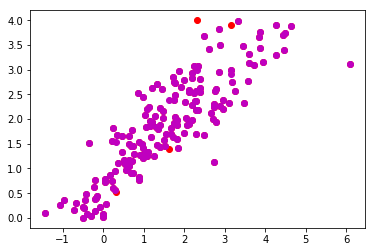

In [186]:
#predicted values
y_predt = valores_finais_predicao + add_values

plt.plot(X_test['radius_mean'] + add_values, y_test +add_values, 'ro', 
         X_test['radius_mean'] + add_values, y_predt, 'mo')



In [187]:
print(classification_report(y_test,y_pred=valores_finais_predicao))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       105
          1       0.97      0.97      0.97        66

avg / total       0.98      0.98      0.98       171



In [ ]:
plt.legend()